In [1]:
import os
os.environ['KAGGLE_USERNAME'] = 'ionutbostan'  # Your Kaggle username
os.environ['KAGGLE_KEY'] = 'c8ec0f8f14961cb4eaee91390ed59ef0'  # Your Kaggle API key
os.environ['URN'] = '6645704'  # Your URN: submissions without a URN will not count

In [2]:
!python3 /usr/local/bin/kaggle competitions download -c uos-com2028-21-22-cw
!unzip uos-com2028-21-22-cw.zip

403 - Forbidden
unzip:  cannot find or open uos-com2028-21-22-cw.zip, uos-com2028-21-22-cw.zip.zip or uos-com2028-21-22-cw.zip.ZIP.


In [3]:
# imports
from tensorflow import keras
from keras import optimizers
from keras.engine import input_spec
from keras.engine.base_layer import Layer
from keras.layers import Rescaling
from keras.layers import Dropout, RandomFlip, RandomCrop, Input, UpSampling2D 
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback
from keras.layers.normalization.batch_normalization import BatchNormalization
from keras.models import Model, Sequential
from tensorflow.keras.utils import image_dataset_from_directory
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, AveragePooling2D
import numpy as np
from tensorflow.keras.utils import to_categorical
from numpy.random import seed
import tensorflow as tf
import shutil, os
import pandas as pd
from matplotlib import pyplot as plt
from tensorflow.keras.metrics import BinaryAccuracy, FalsePositives, FalseNegatives, TruePositives, TrueNegatives, Precision, Recall, AUC
import sklearn
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns

To make testing easier. Everything apart from the best score model has been 
commented out. bold text

In [4]:
# read the labels from the csv file
df = pd.read_csv('train.csv', names=['Id','Cell'])
#remove the id and cell type head
df = df.iloc[1:]
# extract the labels adn sort them
labels = df.sort_values('Cell')

# create a list of unique lables
class_names = list(labels.Cell.unique())


# create new directories
for i in class_names:
    os.makedirs(os.path.join('train4',i))

# itterate throgh all class names
for i in class_names:               
  for c in list(df[df['Cell']== i]['Id']):  
 # immage path
    get_image = os.path.join('train',c+'.jpg')


 # add the imagies to the path
    if not os.path.exists('train/'+c+i):
      # move the image to this path
      shutil.copy(get_image,'train4/'+i)


In [ ]:
# shutil.rmtree('train4')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 1 to 150000
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Id      150000 non-null  object
 1   Cell    150000 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [6]:
df.head()

,Id,Cell
1,000000,3
2,000001,3
3,000002,0
4,000003,2
5,000004,0


In [7]:

colour_mode = 'grayscale'

# image size 
image_size = (28, 28)

# training batch size.
batch_size = 256


train_kidney_dataset = image_dataset_from_directory(
  'train4',
  color_mode=colour_mode,
  validation_split=0.2,
  subset='training',
  seed=42,
  # label_mode='int',
  label_mode='categorical', 
  image_size=image_size,
  batch_size=batch_size)


validation_kidney_dataset = image_dataset_from_directory(
  'train4',
  color_mode=colour_mode,
  validation_split=0.2,
  subset='validation',
  seed=42,
  # label_mode='int',
  label_mode='categorical',  
  image_size=image_size,
  batch_size=batch_size)

test_kidney_dataset = image_dataset_from_directory(
  'test',
  shuffle=False,  # Important: the test dataset order must match Kaggle!
  labels=None,  # Important: the test dataset has no labels...
  color_mode=colour_mode,
  image_size=image_size,
  batch_size=1)  # Don't batch the test samples.




print('Train label names:', train_kidney_dataset.class_names)
print('Test label names (empty):', test_kidney_dataset.class_names)


# You may want to split your code into multiple cells

Found 150000 files belonging to 8 classes.
Using 120000 files for training.
Found 150000 files belonging to 8 classes.
Using 30000 files for validation.
Found 50000 files belonging to 1 classes.
Train label names: ['0', '1', '2', '3', '4', '5', '6', '7']
Test label names (empty): ['']


In [8]:
df.sample(5)

,Id,Cell
56929,056928,6
27587,027586,0
75411,075410,1
58474,058473,0
137098,137097,2


In [9]:
df.Cell.value_counts()

0    48074
6    35608
7    22199
3    13965
4    10697
1     7073
5     7050
2     5334
Name: Cell, dtype: int64

In [28]:

# # 1st model

# activation_f = 'softmax'
# # activation_f = 'sigmoid'

# model = Sequential([
#   Rescaling(1./255),
#   Conv2D(32,(3,3), activation="relu", strides=2,input_shape=(28,28,1), kernel_regularizer='l2'),
#   Flatten(),
#   Dense(128, activation='relu'),
#   Dense(8, activation=activation_f)
# ])



# optimizer = keras.optimizers.Adam(learning_rate=0.001, decay=0.000001)

# # metrics = [
# #         'accuracy',
# #         keras.metrics.Precision(name='precision'),
# #         keras.metrics.Recall(name='recall')
# #     ]

# model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = 'accuracy')
# # lr_reduce = tf.keras.callbacks.ReduceLROnPlateau(
# #     monitor="val_loss",
# #     factor=0.2,
# #     patience=3,
# #     verbose=1,
# #     mode="min",
# #     min_lr=0.000001
# # )

In [29]:
# history = model.fit(train_kidney_dataset, validation_data=validation_kidney_dataset,verbose=1,epochs=50)
# model.fit(train_kidney_dataset, validation_data=validation_kidney_dataset,verbose=1,epochs=50)

Epoch 1/50
469/469 [==============================] - 59s 44ms/step - loss: 1.4684 - accuracy: 0.4759 - val_loss: 1.4038 - val_accuracy: 0.4920
Epoch 2/50
469/469 [==============================] - 20s 43ms/step - loss: 1.3647 - accuracy: 0.5090 - val_loss: 1.3503 - val_accuracy: 0.5144
Epoch 3/50
469/469 [==============================] - 20s 43ms/step - loss: 1.3262 - accuracy: 0.5223 - val_loss: 1.3290 - val_accuracy: 0.5246
Epoch 4/50
469/469 [==============================] - 20s 43ms/step - loss: 1.2983 - accuracy: 0.5328 - val_loss: 1.3175 - val_accuracy: 0.5236
Epoch 5/50
469/469 [==============================] - 21s 44ms/step - loss: 1.2733 - accuracy: 0.5416 - val_loss: 1.2970 - val_accuracy: 0.5344
Epoch 6/50
469/469 [==============================] - 20s 43ms/step - loss: 1.2513 - accuracy: 0.5513 - val_loss: 1.2876 - val_accuracy: 0.5372
Epoch 7/50
469/469 [==============================] - 20s 43ms/step - loss: 1.2334 - accuracy: 0.5567 - val_loss: 1.2821 - val_accuracy:

In [30]:
# model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_8 (Rescaling)     (None, 28, 28, 1)         0         
                                                                 
 conv2d_46 (Conv2D)          (None, 13, 13, 32)        320       
                                                                 
 flatten_8 (Flatten)         (None, 5408)              0         
                                                                 
 dense_16 (Dense)            (None, 128)               692352    
                                                                 
 dense_17 (Dense)            (None, 8)                 1032      
                                                                 
Total params: 693,704
Trainable params: 693,704
Non-trainable params: 0
_________________________________________________________________


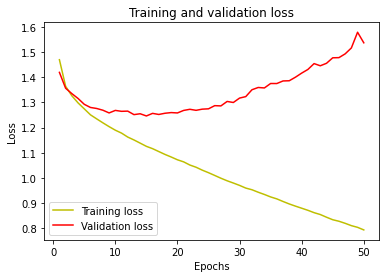

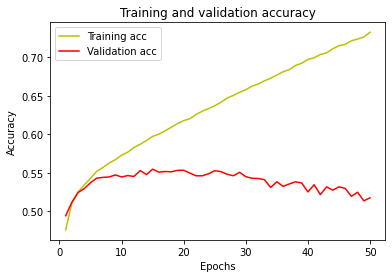

In [16]:
# loss = history.history['loss']
# val_loss = history.history['val_loss']
# epochs = range(1, len(loss) + 1)
# plt.plot(epochs, loss, 'y', label='Training loss')
# plt.plot(epochs, val_loss, 'r', label='Validation loss')
# plt.title('Training and validation loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()


# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']
# plt.plot(epochs, acc, 'y', label='Training acc')
# plt.plot(epochs, val_acc, 'r', label='Validation acc')
# plt.title('Training and validation accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()

In [16]:

#2nd model

# activation_f = 'softmax'


# model = Sequential([
#   Rescaling(1./255),
#   Conv2D(16,(3,3), activation="relu", strides=2,input_shape=(28,28,1)),
#   Dropout(0.5),
#   Conv2D(32,(3,3), activation="relu", strides=2,input_shape=(28,28,1)),
#   Dropout(0.5),
#   Conv2D(32,(3,3), activation="relu", strides=2,input_shape=(28,28,1)),
#   Dropout(0.5),
#   Flatten(),
#   Dense(128, activation='relu'),
#   Dense(8, activation=activation_f)
# ])



# optimizer = keras.optimizers.Adam(learning_rate=0.001, decay=0.000001)

# # metrics = [
# #         'accuracy',
# #         keras.metrics.Precision(name='precision'),
# #         keras.metrics.Recall(name='recall')
# #     ]

# model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = 'accuracy')
# # lr_reduce = tf.keras.callbacks.ReduceLROnPlateau(
# #     monitor="val_loss",
# #     factor=0.2,
# #     patience=3,
# #     verbose=1,
# #     mode="min",
# #     min_lr=0.000001
# # )
# # model.fit(train_kidney_dataset, validation_data=validation_kidney_dataset,verbose=1,epochs=50)
# history = model.fit(train_kidney_dataset, validation_data=validation_kidney_dataset,verbose=1,epochs=50)

# loss = history.history['loss']
# val_loss = history.history['val_loss']
# epochs = range(1, len(loss) + 1)
# plt.plot(epochs, loss, 'y', label='Training loss')
# plt.plot(epochs, val_loss, 'r', label='Validation loss')
# plt.title('Training and validation loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()


# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']
# plt.plot(epochs, acc, 'y', label='Training acc')
# plt.plot(epochs, val_acc, 'r', label='Validation acc')
# plt.title('Training and validation accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()

Epoch 1/50
469/469 [==============================] - 22s 44ms/step - loss: 1.6268 - accuracy: 0.4011 - precision: 0.6143 - recall: 0.1239 - val_loss: 1.4972 - val_accuracy: 0.4433 - val_precision: 0.6417 - val_recall: 0.2010
Epoch 2/50
469/469 [==============================] - 21s 44ms/step - loss: 1.5080 - accuracy: 0.4443 - precision: 0.6339 - recall: 0.2023 - val_loss: 1.4304 - val_accuracy: 0.4692 - val_precision: 0.6994 - val_recall: 0.2015
Epoch 3/50
469/469 [==============================] - 21s 44ms/step - loss: 1.4780 - accuracy: 0.4544 - precision: 0.6439 - recall: 0.2197 - val_loss: 1.4075 - val_accuracy: 0.4809 - val_precision: 0.7240 - val_recall: 0.1837
Epoch 4/50
469/469 [==============================] - 21s 43ms/step - loss: 1.4570 - accuracy: 0.4615 - precision: 0.6535 - recall: 0.2323 - val_loss: 1.3848 - val_accuracy: 0.4832 - val_precision: 0.7109 - val_recall: 0.2196
Epoch 5/50
469/469 [==============================] - 21s 43ms/step - loss: 1.4456 - accuracy: 0

In [17]:
# model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 28, 28, 1)         0         
                                                                 
 conv2d_31 (Conv2D)          (None, 13, 13, 16)        160       
                                                                 
 dropout_9 (Dropout)         (None, 13, 13, 16)        0         
                                                                 
 conv2d_32 (Conv2D)          (None, 6, 6, 32)          4640      
                                                                 
 dropout_10 (Dropout)        (None, 6, 6, 32)          0         
                                                                 
 conv2d_33 (Conv2D)          (None, 2, 2, 32)          9248      
                                                                 
 dropout_11 (Dropout)        (None, 2, 2, 32)         

In [ ]:
# best model 1 65%

# model = Sequential([
#   Rescaling(1./255),
#   # Your layers here.
#   RandomFlip("horizontal_and_vertical"),
#   Conv2D(16,(3,3), activation="relu",  padding='same',input_shape=(28,28,1)),
#   Conv2D(16,(3,3),activation="relu", padding='same'),
#   Conv2D(16,(3,3),activation="relu", padding='same'),
#   BatchNormalization(),
#   MaxPooling2D((2,2)),
#   Dropout(0.25),
  
#   Conv2D(32,(3,3),activation="relu", padding='same'),
#   Conv2D(32,(3,3),activation="relu", padding='same'),
#   Conv2D(32,(3,3),activation="relu", padding='same'),
#   BatchNormalization(),
#   MaxPooling2D((2,2)),
#   Dropout(0.25),

#   Conv2D(64,(3,3),activation="relu", padding='same'),
#   Conv2D(64,(3,3),activation="relu", padding='same'),
#   BatchNormalization(),
#   MaxPooling2D((2,2)),
#   Conv2D(64,(3,3),activation="relu", padding='same'),
#   Conv2D(128,(3,3),activation="relu", padding='same'),
#   BatchNormalization(),
#   MaxPooling2D((2,2)),
#   Dropout(0.5),
#   Flatten(),
#   Dense(512,activation='relu'),
#   Dense(8, activation='softmax')
# ])


# METRICS = [
#         'accuracy',
#         keras.metrics.Precision(name='precision'),
#         keras.metrics.Recall(name='recall')
#     ]

# model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = METRICS)
# lr_reduce = tf.keras.callbacks.ReduceLROnPlateau(
#     monitor="val_loss",
#     factor=0.2,
#     patience=3,
#     verbose=1,
#     mode="min",
#     min_lr=0.000001
# )

# model.fit(train_kidney_dataset, validation_data=validation_kidney_dataset,verbose=1,epochs=70, callbacks=[lr_reduce])

In [10]:
# best model 4 65.73

model = Sequential([
  Rescaling(1./255),

  RandomFlip("horizontal_and_vertical"),
  Conv2D(16,(3,3), activation="relu",  padding='same',input_shape=(28,28,1)),
  Conv2D(16,(3,3),activation="relu", padding='same'),
  Conv2D(16,(3,3),activation="relu", padding='same'),
  BatchNormalization(),
  MaxPooling2D((2,2)),
  Dropout(0.25),
  
  Conv2D(32,(3,3),activation="relu", padding='same'),
  Conv2D(32,(3,3),activation="relu", padding='same'),
  Conv2D(32,(3,3),activation="relu", padding='same'),
  BatchNormalization(),
  MaxPooling2D((2,2)),
  Dropout(0.25),
  
  Conv2D(64,(3,3),activation="relu", padding='same'),
  Conv2D(64,(3,3),activation="relu", padding='same'),
  BatchNormalization(),
  MaxPooling2D((2,2)),
  Conv2D(64,(3,3),activation="relu", padding='same'),
  Conv2D(128,(3,3),activation="relu", padding='same'),
  BatchNormalization(),
  MaxPooling2D((2,2)),
  Dropout(0.5),
  Flatten(),
  Dense(512,activation='relu'),
  Dense(8, activation='softmax')
])

METRICS = [
        'accuracy',
        keras.metrics.Precision(name='precision'),
        keras.metrics.Recall(name='recall')
    ]

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = METRICS)
lr_reduce = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.2,
    patience=4,
    verbose=1,
    mode="min",
    min_lr=0.000001
)

model.fit(train_kidney_dataset, validation_data=validation_kidney_dataset,verbose=1,epochs=90, callbacks=[lr_reduce])

# loss = history.history['loss']
# val_loss = history.history['val_loss']
# epochs = range(1, len(loss) + 1)
# plt.plot(epochs, loss, 'y', label='Training loss')
# plt.plot(epochs, val_loss, 'r', label='Validation loss')
# plt.title('Training and validation loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()


# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']
# plt.plot(epochs, acc, 'y', label='Training acc')
# plt.plot(epochs, val_acc, 'r', label='Validation acc')
# plt.title('Training and validation accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()

Epoch 1/90
469/469 [==============================] - 33s 48ms/step - loss: 1.4090 - accuracy: 0.4784 - precision: 0.6697 - recall: 0.2770 - val_loss: 2.1324 - val_accuracy: 0.2489 - val_precision: 0.2999 - val_recall: 0.2232 - lr: 0.0010
Epoch 2/90
469/469 [==============================] - 22s 47ms/step - loss: 1.2690 - accuracy: 0.5260 - precision: 0.7085 - recall: 0.3389 - val_loss: 1.3354 - val_accuracy: 0.5266 - val_precision: 0.6743 - val_recall: 0.3875 - lr: 0.0010
Epoch 3/90
469/469 [==============================] - 22s 47ms/step - loss: 1.2233 - accuracy: 0.5458 - precision: 0.7155 - recall: 0.3629 - val_loss: 1.1789 - val_accuracy: 0.5605 - val_precision: 0.7117 - val_recall: 0.3948 - lr: 0.0010
Epoch 4/90
469/469 [==============================] - 22s 47ms/step - loss: 1.1893 - accuracy: 0.5610 - precision: 0.7183 - recall: 0.3864 - val_loss: 1.1685 - val_accuracy: 0.5678 - val_precision: 0.7047 - val_recall: 0.4216 - lr: 0.0010
Epoch 5/90
469/469 [========================

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 28, 28, 1)         0         
                                                                 
 random_flip (RandomFlip)    (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 16)        2320      
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 16)        2320      
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 16)       64        
 ormalization)                                                   
                                                        

Epoch 1/60
469/469 [==============================] - 25s 49ms/step - loss: 1.5998 - accuracy: 0.4159 - precision: 0.6288 - recall: 0.1776 - val_loss: 2.0883 - val_accuracy: 0.2629 - val_precision: 0.3179 - val_recall: 0.2143 - lr: 0.0010
Epoch 2/60
469/469 [==============================] - 24s 51ms/step - loss: 1.4176 - accuracy: 0.4770 - precision: 0.6702 - recall: 0.2745 - val_loss: 1.3956 - val_accuracy: 0.4742 - val_precision: 0.7359 - val_recall: 0.2040 - lr: 0.0010
Epoch 3/60
469/469 [==============================] - 23s 49ms/step - loss: 1.3738 - accuracy: 0.4882 - precision: 0.6864 - recall: 0.2886 - val_loss: 1.3647 - val_accuracy: 0.4841 - val_precision: 0.6782 - val_recall: 0.2853 - lr: 0.0010
Epoch 4/60
469/469 [==============================] - 24s 50ms/step - loss: 1.3464 - accuracy: 0.4986 - precision: 0.6962 - recall: 0.2984 - val_loss: 1.3413 - val_accuracy: 0.4924 - val_precision: 0.7793 - val_recall: 0.2455 - lr: 0.0010
Epoch 5/60
469/469 [========================

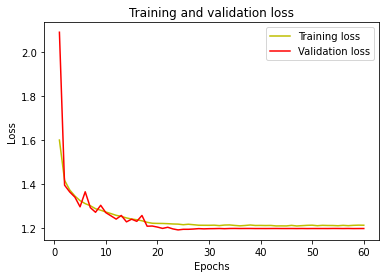

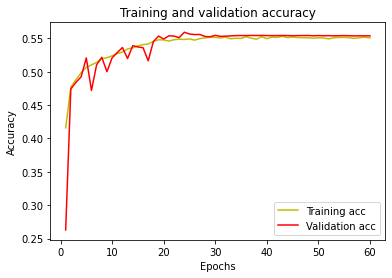

In [19]:
# model 3
# model = Sequential([
#   Rescaling(1./255),

#   RandomFlip("horizontal_and_vertical"),
#   Conv2D(16,(3,3), activation="relu",  padding='same',input_shape=(28,28,1)),
#   Conv2D(16,(3,3),activation="relu", padding='same'),
#   Conv2D(16,(3,3),activation="relu", padding='same'),
#   BatchNormalization(),
#   AveragePooling2D((2,2)),
#   Dropout(0.25),
  
#   Conv2D(32,(3,3),activation="relu", padding='same'),
#   Conv2D(32,(3,3),activation="relu", padding='same'),
#   Conv2D(32,(3,3),activation="relu", padding='same'),
#   BatchNormalization(),
#   AveragePooling2D((2,2)),
#   Dropout(0.25),

#   Conv2D(64,(3,3),activation="relu", padding='same'),
#   Conv2D(64,(3,3),activation="relu", padding='same'),
#   BatchNormalization(),
#   AveragePooling2D((2,2)),
#   Dropout(0.25),


#   Conv2D(64,(3,3),activation="relu", padding='same'),
#   Conv2D(128,(3,3),activation="relu", padding='same'),
#   BatchNormalization(),
#   AveragePooling2D((2,2)),
#   Dropout(0.25),

#   Dropout(0.5),
#   Flatten(),
#   Dense(512,activation='relu'),
#   Dense(8, activation='softmax')
# ])


# # METRICS = [
# #         BinaryAccuracy(name='BA'),
# #         TruePositives(name='TP'),
# #         FalsePositives(name='FP'),
# #         TrueNegatives(name= 'TN'),
# #         FalseNegatives(name='FN'),
# #         Precision(name='PR'),
# #         Recall(name='RE'),
# #         AUC(name='AUC')
# #     ]
# metrics = [
#         'accuracy',
#         keras.metrics.Precision(name='precision'),
#         keras.metrics.Recall(name='recall')
#     ]
# optimizer  = keras.optimizers.SGD(learning_rate=0.001, momentum = 0.9)


# model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = metrics)
# lr_reduce = tf.keras.callbacks.ReduceLROnPlateau(
#     monitor="val_loss",
#     factor=0.2,
#     patience=3,
#     verbose=1,
#     mode="min",
#     min_lr=0.000001
# )

# history = model.fit(train_kidney_dataset, validation_data=validation_kidney_dataset,verbose=1,epochs=60, callbacks=[lr_reduce])

# loss = history.history['loss']
# val_loss = history.history['val_loss']
# epochs = range(1, len(loss) + 1)
# plt.plot(epochs, loss, 'y', label='Training loss')
# plt.plot(epochs, val_loss, 'r', label='Validation loss')
# plt.title('Training and validation loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()


# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']
# plt.plot(epochs, acc, 'y', label='Training acc')
# plt.plot(epochs, val_acc, 'r', label='Validation acc')
# plt.title('Training and validation accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()

In [20]:

# model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 28, 28, 1)         0         
                                                                 
 random_flip_4 (RandomFlip)  (None, 28, 28, 1)         0         
                                                                 
 conv2d_34 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 conv2d_35 (Conv2D)          (None, 28, 28, 16)        2320      
                                                                 
 conv2d_36 (Conv2D)          (None, 28, 28, 16)        2320      
                                                                 
 batch_normalization_12 (Bat  (None, 28, 28, 16)       64        
 chNormalization)                                                
                                                      

In [22]:
# model.evaluate(validation_kidney_dataset)

118/118 [==============================] - 4s 33ms/step - loss: 0.9404 - accuracy: 0.6539 - precision: 0.7468 - recall: 0.5504


[0.9403631687164307,
 0.6538666486740112,
 0.7468113899230957,
 0.5504000186920166]

CONFUSION MATRIX

In [16]:
predictions = model.predict(test_kidney_dataset)


In [17]:
final_predictions = np.argmax(predictions, axis=1)

# for prediction in np.argmax(predictions, axis=1):
#   if prediction == 0:
#     final_predictions.append('0')
#   elif prediction == 1:
#     final_predictions.append('1')
#   elif prediction == 2:
#     final_predictions.append('2')
#   elif prediction == 3:
#     final_predictions.append('3')
#   elif prediction == 4:
#     final_predictions.append('4')
#   elif prediction == 5:
#     final_predictions.append('5')
#   elif prediction == 6:
#     final_predictions.append('6')
#   else:
#     final_predictions.append('7')

In [18]:
print(final_predictions)

[0 6 7 ... 1 6 6]


In [41]:
from pandas import DataFrame
DataFrame(data={'Cell type': final_predictions}).to_csv('predictions.csv', index_label='Id')

In [42]:
!python3 /usr/local/bin/kaggle competitions submit -m $URN -c uos-com2028-21-22-cw -f predictions.csv

100% 380k/380k [00:04<00:00, 86.2kB/s]
Successfully submitted to COM2028 21/22 CW